# Install Library

In [ ]:
!pip install kagglehub
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


# Import Package

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

# Data Load

Pada tahap ini, kami mengambil dataset dari sumber berikut :

https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [ ]:
# Download dataset
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
print("Path to dataset files:", path)

# Load dataset
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

Path to dataset files: /kaggle/input/sleep-health-and-lifestyle-dataset


In [ ]:
print("Initial data preview:")
df.head()

Initial data preview:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Data Understanding

### Cek Informasi Data

Dalam Cell dibawah ini dapat kita ketahui bahwa dataset terdiri dari 374 barus data dengan 13 kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### Pengecekan Duplikasi Data

Pada tahapan ini kita dapat melakukan pengecekan duplikasi data dengan df.`duplicated().sum(). `Setelah melakukan pengecekan ternyata tidak terdapat indikasi duplikasi data.

In [ ]:
print('\nJumlah Data Duplikat : ', df.duplicated().sum())


Jumlah Data Duplikat :  0


### Pengecekan Missing Value

pada tahapan ini kita dapat melakukan pengecekan missing value dalam dataset tersebut diantaranya menggunakan fungsi .`isnull().sum()` untuk mengetahui missing value di setiap kolom

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


Berdasarkan output diatas ditemukan adanya missing value pada kolom rating sebanyak 219 baris sehingga pada bagian Sleep Disorder nantinya akan dilakukan Penanganan Missing Value.

### Distribusi Data

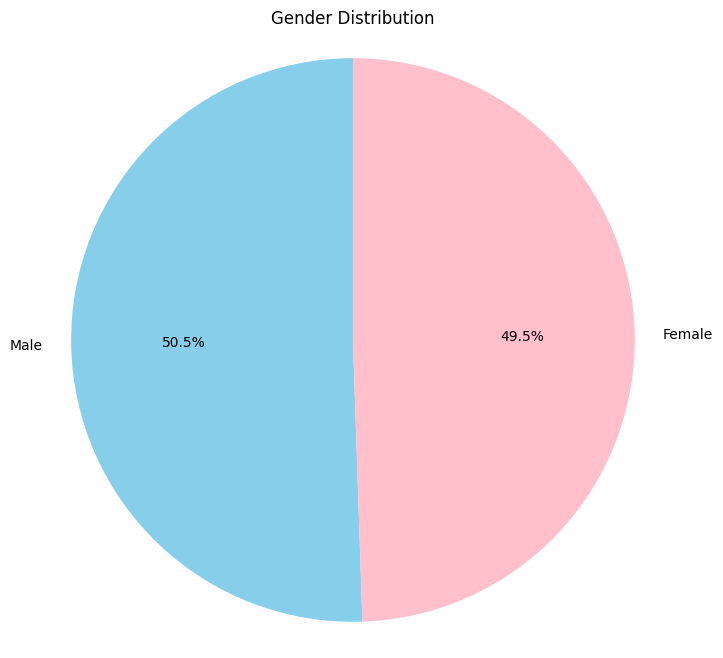

In [ ]:
gender_counts = df['Gender'].value_counts()
gender_percentages = gender_counts / len(df) * 100


plt.figure(figsize=(8, 8))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

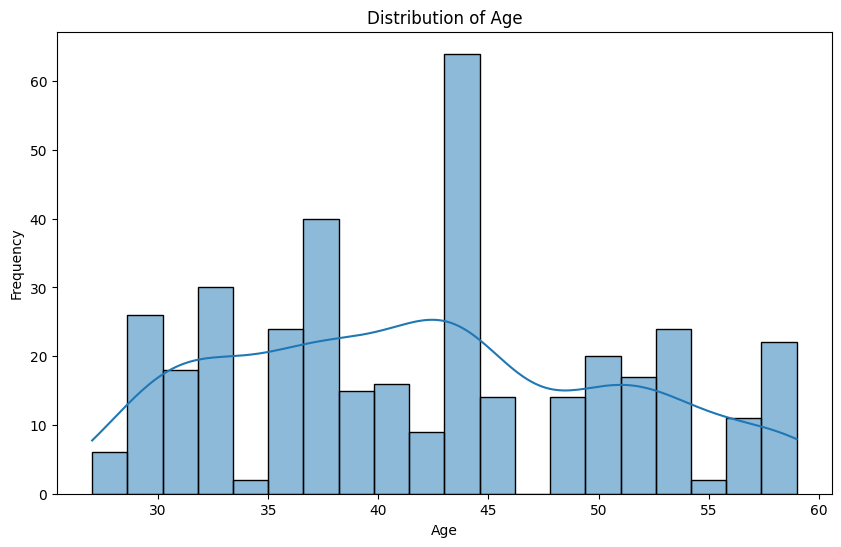

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

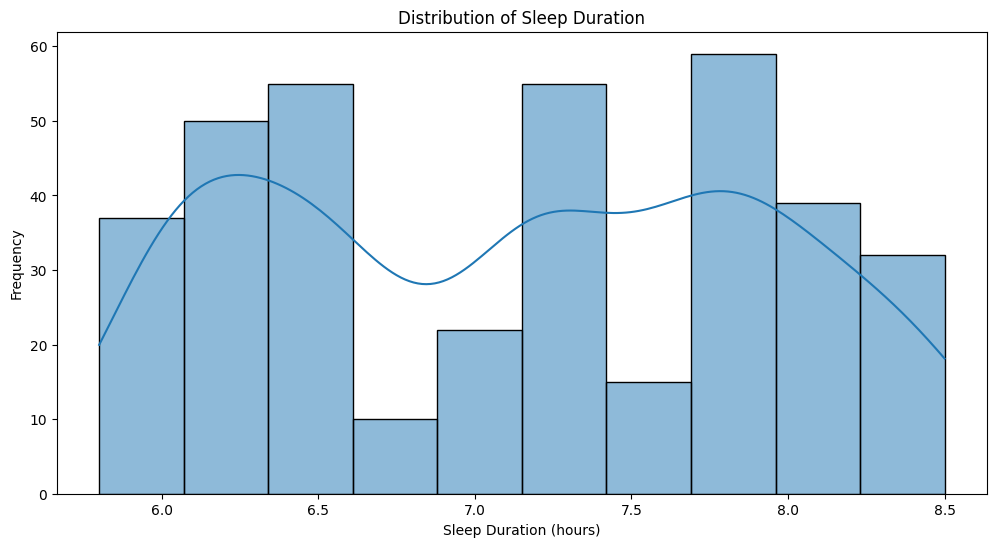

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Sleep Duration'], bins=10, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

### Pengelompokan Tipe Data

pada tahapan ini saya mengecek tipe data terhadap kolom yang akan di gunakan untuk permodelan, disini saya menggunakan `df.select_dtypes(include=['number']).columns.tolist()` dan `df.select_dtypes(include=['object']).columns.tolist()`. dapat dilihat pada output dibawah kode tersebut apa saja kolom dengan tipe data numerik dam kolom dengan data kategorikal

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
print(categorical_cols)


Numerical columns:
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

Categorical columns:
['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
print("\nDescriptive statistics for numerical variables:")
print(numeric_data.describe())


Descriptive statistics for numerical variables:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.00000

# Data Preprocessing

### Penanganan Missing Value

Dalam tahapan ini, kami tidak menggunakan kolom 'Person ID', 'Blood Pressure', 'Occupation', dan 'Heart Rate' karena dianggap cukup rumit untuk diintegrasikan dan dimasukkan ke dalam formulir, mengingat proses pengambilan parametriknya yang cukup kompleks

In [ ]:
df.drop(columns=['Person ID','Blood Pressure','Occupation', 'Heart Rate'], axis=1, inplace=True)

Pada tahapan ini kami mengisi nilai NaN atau missing value pada kolom sleep disorder dengan data 'Normal' untuk penanganan missing value

In [ ]:
df['Sleep Disorder'] = np.where(df['Sleep Disorder'].isna(), 'Normal', df['Sleep Disorder'])
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,4200,Normal
1,Male,28,6.2,6,60,8,Normal,10000,Normal
2,Male,28,6.2,6,60,8,Normal,10000,Normal
3,Male,28,5.9,4,30,8,Obese,3000,Sleep Apnea
4,Male,28,5.9,4,30,8,Obese,3000,Sleep Apnea


In [ ]:
print("\nUpdated data sample:")
print(df.head())


Updated data sample:
  Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0   Male   27             6.1                 6                       42   
1   Male   28             6.2                 6                       60   
2   Male   28             6.2                 6                       60   
3   Male   28             5.9                 4                       30   
4   Male   28             5.9                 4                       30   

   Stress Level BMI Category  Daily Steps Sleep Disorder  
0             6   Overweight         4200         Normal  
1             8       Normal        10000         Normal  
2             8       Normal        10000         Normal  
3             8        Obese         3000    Sleep Apnea  
4             8        Obese         3000    Sleep Apnea  


### Label Encoding

Pada tahapan ini kami melakukan encoding untuk data kategorikal menjadi data numerik agar bisa digunakan dalam permodelan lebih mudah.

In [ ]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
bmi_encoder = LabelEncoder()


df['Gender'] = gender_encoder.fit_transform(df['Gender'])
df['BMI Category'] = bmi_encoder.fit_transform(df['BMI Category'])

df['Sleep Disorder'] = df['Sleep Disorder'].map({'Normal': 0, 'Sleep Apnea': 1, 'Insomnia': 2})

In [ ]:
print(df.head())

   Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0       1   27             6.1                 6                       42   
1       1   28             6.2                 6                       60   
2       1   28             6.2                 6                       60   
3       1   28             5.9                 4                       30   
4       1   28             5.9                 4                       30   

   Stress Level  BMI Category  Daily Steps  Sleep Disorder  
0             6             3         4200               0  
1             8             0        10000               0  
2             8             0        10000               0  
3             8             2         3000               1  
4             8             2         3000               1  


### Split & Train Data

Sebelum memasuki tahap pemodelan, saya membagi dataset menjadi dua bagian utama, yaitu fitur (x) dan label/target (y). Fitur adalah semua kolom kecuali kolom 'Sleep Disorder', sedangkan label adalah kolom 'Sleep Disorder' itu sendiri. Setelah itu, saya melakukan pembagian data menjadi:

* Data latih (training set) sebanyak 80%

* Data uji (testing set) sebanyak 20%

Pembagian ini dilakukan menggunakan fungsi train_test_split dari Scikit-Learn dengan parameter random_state=42 agar hasil pembagian data bersifat reproducible (konsisten setiap kali dijalankan).



In [ ]:
# Split Data Training
x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

print("x : ", x.shape)
print("y :", y.shape)

x :  (374, 8)
y : (374,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Langkah selanjutnya pada tahapan ini saya melakukan normalisasi menggunakan `StandardScaler()` dengan tujuan meningkatkan hasil prediksi lebih akurat dan stabil dan menyimpannya ke scaler.save untuk kebutuhan back end

In [ ]:
# Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target to categorical format for Keras
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Simpan scaler ke file
joblib.dump(scaler, 'scaler.save')

['scaler.save']

# Modelling Classification

Disini kami melakukan implementasi metode klasifikasi menggunakan model Artficial Neural Network berbasis Keras dan TensorFlow. Tujuannya adalah untuk memprediksi kategori gangguan tidur berdasarkan data.

Pertama, kami melakukan penetapan random seed untuk memastikan bahwa proses pelatihan model menghasilkan hasil yang konsisten dan dapat direproduksi saat kode dijalankan ulang.

In [ ]:
# Set random seed
import random
random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

Selanjutnya, kami membuat model klasisifikasinya dengan dua arsitektur, yaitu :


*   Simple Neural Network
*   Deep Neural Network : Setiap model terdiri dari beberapa layer Dense dengan aktivasi ReLU, disertai dengan Batch Normalization dan Dropout untuk mengurangi risiko overfitting.



In [ ]:
def create_model(name, input_shape):
    if name == 'simple_nn':
        model = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(3, activation='softmax')
        ])
    elif name == 'deep_nn':
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.4),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(3, activation='softmax')
        ])
    else:  # Default model
        model = keras.Sequential([
            layers.Dense(32, activation='relu', input_shape=(input_shape,)),
            layers.Dense(16, activation='relu'),
            layers.Dense(3, activation='softmax')
        ])

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )


    return model

Setelah model arsitekturnya dibuat, kami melakukan pelatihan dan evaluasi model. Pada tahap ini, model dilatih menggunakan data training dengan validasi silang sebesar 20%. Selama proses pelatihan, digunakan *Early Stopping* untuk menghentikan pelatohan jika tidak terjadi perbaikan pada nilai *validation loss* . Model kemudian dievaluasi menggunakan data uji untuk memperoleh metrik akurasi, presisi, recall, dan F1-score.

In [ ]:
# Define models
models = {
    'Simple Neural Network': create_model('simple_nn', X_train_scaled.shape[1]),
    'Deep Neural Network': create_model('deep_nn', X_train_scaled.shape[1])
}

# Store results
results = []

# Training and evaluation
for name, model in models.items():
    print(f"\nTraining {name}...")

    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    print(model.summary())

    history = model.fit(
        X_train_scaled, y_train_cat,
        epochs=100,
        batch_size=16,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

    # Get predictions
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': test_acc,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })


Training Simple Neural Network...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,139 (12.26 KB)

 Trainable params: 2,947 (11.51 KB)

 Non-trainable params: 192 (768.00 B)

None
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4358 - loss: 1.2909 - val_accuracy: 0.7500 - val_loss: 0.9389
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6768 - loss: 0.9095 - val_accuracy: 0.8333 - val_loss: 0.8520
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7402 - loss: 0.7679 - val_accuracy: 0.8500 - val_loss: 0.7895
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7324 - loss: 0.6423 - val_accuracy: 0.8667 - val_loss: 0.7437
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7565 - loss: 0.5942 - val_accuracy: 0.8667 - val_loss: 0.7028
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8122 - loss: 0.5544 - val_accuracy: 0.8667 - val_loss: 0.6736
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8453 - loss: 0.5234 - val_accuracy: 0.8667 - val_loss: 0.6440
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8192 - loss: 0.5210 - val_accuracy:

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,483 (48.76 KB)

 Trainable params: 12,035 (47.01 KB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4329 - loss: 1.1559 - val_accuracy: 0.5833 - val_loss: 1.0229
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6742 - loss: 0.8224 - val_accuracy: 0.7667 - val_loss: 0.9594
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7188 - loss: 0.6703 - val_accuracy: 0.7667 - val_loss: 0.9070
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7573 - loss: 0.6690 - val_accuracy: 0.7667 - val_loss: 0.8619
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7780 - loss: 0.6146 - val_accuracy: 0.7833 - val_loss: 0.8220
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8052 - loss: 0.5503 - val_accuracy: 0.8500 - val_loss: 0.7737
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8360 - loss: 0.4689 - val_accuracy: 0.8667 - val_loss: 0.7229
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8241 - loss: 0.5408 - val_accuracy: 0

Tahapan berikutnya adalah melakukan perbandingan hasil evaluasi kinerja dari kedua model, dubandingkan dalam bentuk tabel untuk menentukan model dengan performa terbaik, dan hasil yang didapatkan adalah Simple Neural Network

# Evaluation

In [ ]:
# buat perbandingan dataframe
evaluation_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(evaluation_df)


Model Performance Comparison:
                   Model  Accuracy  Precision    Recall  F1-Score
0  Simple Neural Network  0.893333   0.891302  0.893333  0.891273
1    Deep Neural Network  0.880000   0.883344  0.880000  0.874835


Selanjutnya adalah melakukan visualisasi hasilnya dalam bentuk grafik learning curve (akurasi dan loss), confusion matrix, serta analisis feature importance menggunakan model sederhana dengan regularisasi L1.

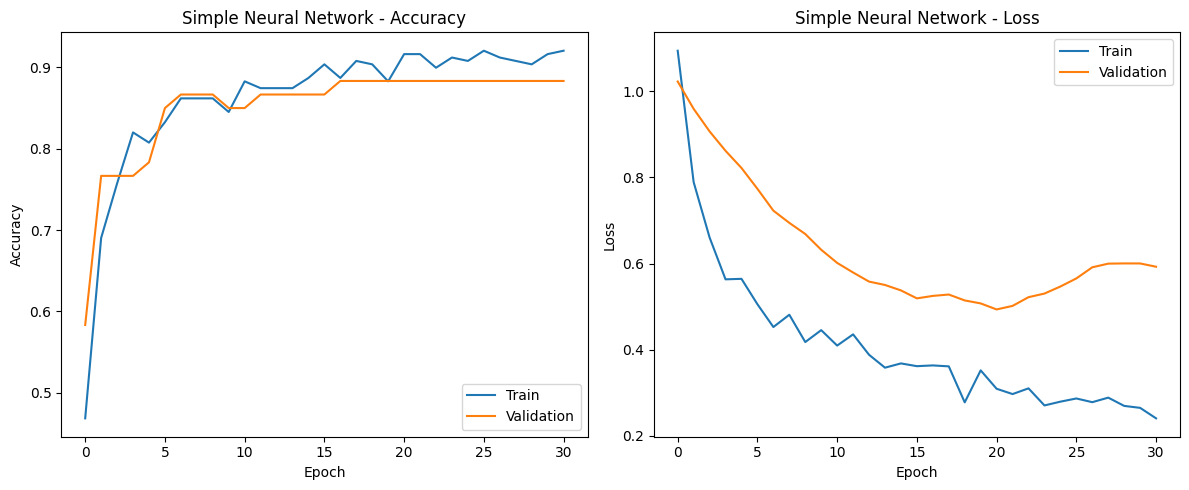

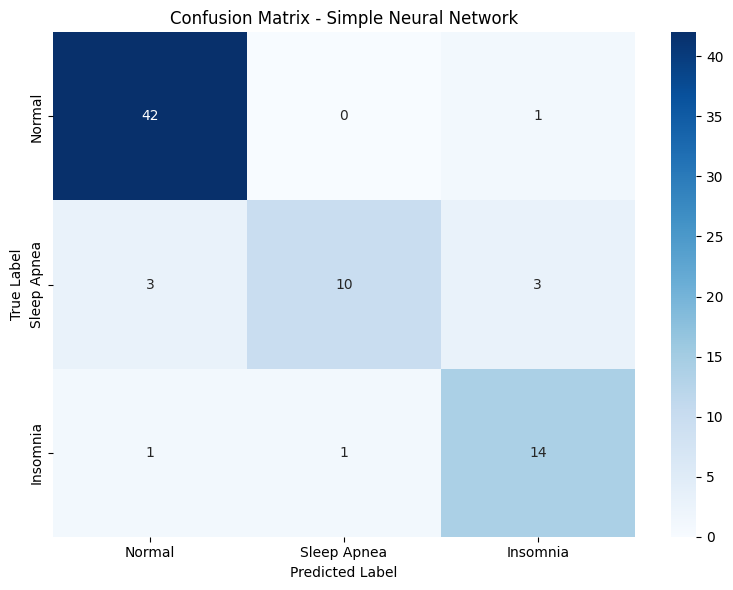

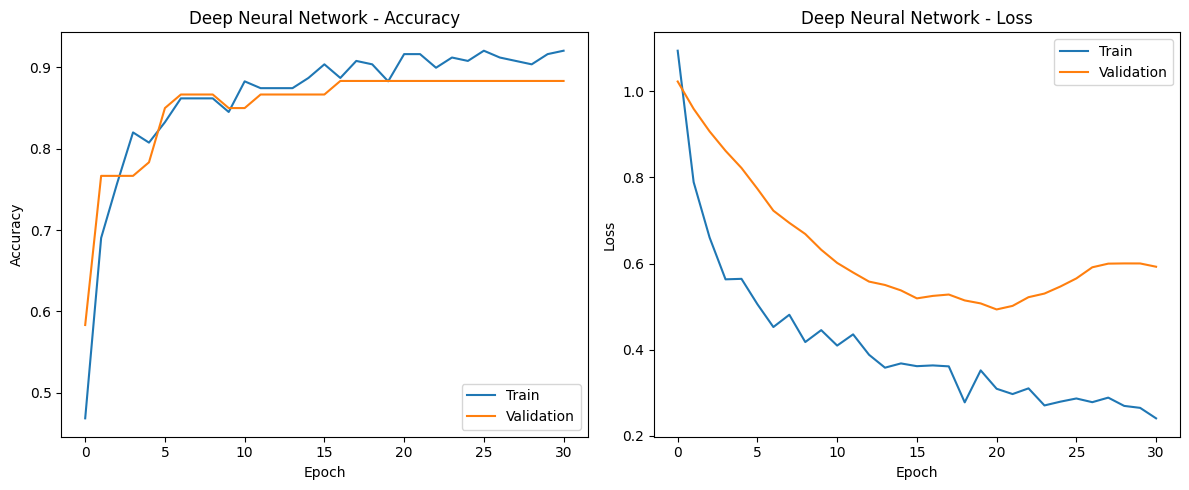

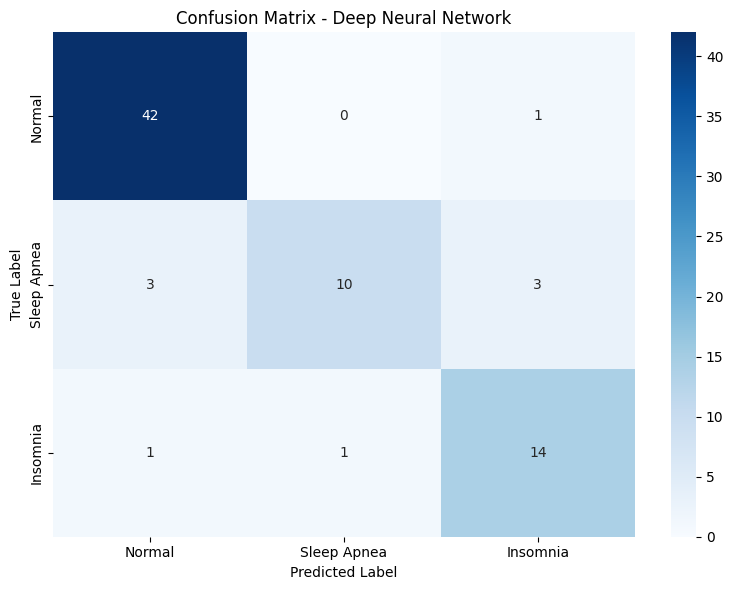

In [ ]:
# history plot
for name, model in models.items():
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{name} - Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{name} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Sleep Apnea', 'Insomnia'],
                yticklabels=['Normal', 'Sleep Apnea', 'Insomnia'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

## Feature Importance Analysis


Analyzing feature importance...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


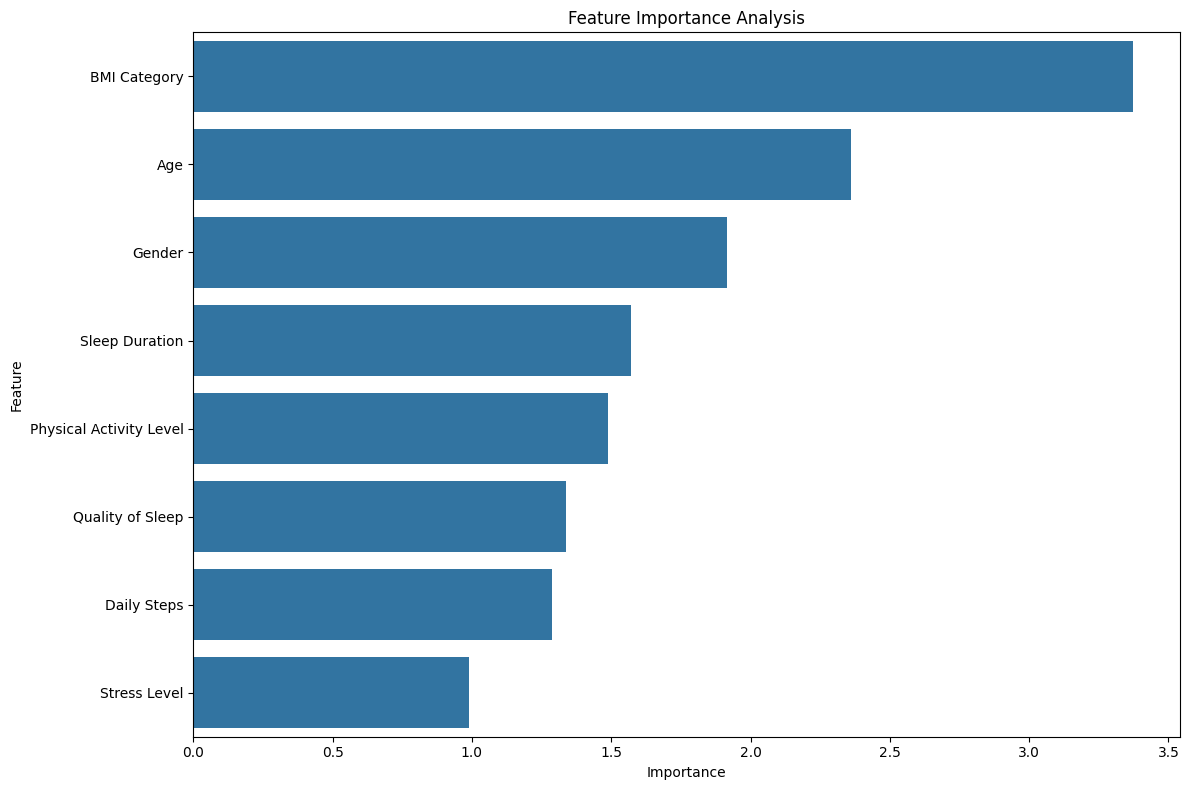


Feature Importance Ranking:
                   Feature  Importance
6             BMI Category    3.371850
1                      Age    2.359525
0                   Gender    1.914971
2           Sleep Duration    1.571939
4  Physical Activity Level    1.487433
3         Quality of Sleep    1.337596
7              Daily Steps    1.287680
5             Stress Level    0.989849


In [ ]:
# ----------------------------------
# Feature Importance Analysis using a simpler model
# ----------------------------------
# We'll use a simple model with L1 regularization to estimate feature importance

print("\nAnalyzing feature importance...")
feature_importance_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],),
                kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dense(3, activation='softmax')
])

feature_importance_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

feature_importance_model.fit(
    X_train_scaled, y_train_cat,
    epochs=50,
    batch_size=16,
    verbose=0
)

# Get the weights from the first layer
weights = feature_importance_model.layers[0].get_weights()[0]
importance = np.sum(np.abs(weights), axis=1)

# Create feature importance DataFrame
feature_names = x.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Analysis')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(importance_df)

Kemudian model disimpan dalam format HDF5 untuk digunakan kembali dalam proses prediksi.

In [ ]:
best_model_name = evaluation_df.loc[evaluation_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"\nSaving the best model: {best_model_name}")
best_model.save('sleep_disorder_prediction_model.h5')
print("Model saved as 'sleep_disorder_prediction_model.h5'")


Saving the best model: Simple Neural Network
Model saved as 'sleep_disorder_prediction_model.h5'


# Testing

In [ ]:
print("\nExample prediction with the best model:")
# Create a sample input
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)

# Make prediction
prediction_prob = best_model.predict(sample_scaled)
prediction_class = np.argmax(prediction_prob, axis=1)[0]

# Map prediction to class name
disorder_map = {0: 'Normal', 1: 'Sleep Apnea', 2: 'Insomnia'}
predicted_disorder = disorder_map[prediction_class]

print("Sample input features:", sample.values)
print("Prediction probabilities:", prediction_prob[0])
print(f"Predicted sleep disorder: {predicted_disorder} (class {prediction_class})")
print(f"Actual sleep disorder class: {y_test.iloc[0]} ({disorder_map[y_test.iloc[0]]})")


Example prediction with the best model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Sample input features: [[0.0e+00 5.3e+01 8.5e+00 9.0e+00 3.0e+01 3.0e+00 0.0e+00 5.0e+03]]
Prediction probabilities: [0.9363566  0.02733695 0.03630641]
Predicted sleep disorder: Normal (class 0)
Actual sleep disorder class: 0 (Normal)


Kode berikut adalah fungsi prediksi berbasis input manual dari pengguna, dimana data yang dimasukkan akan diproses sesuai dengan skema preprocessing training sebelum diprediksi oleh model.

In [ ]:
def predict_sleep_disorder(model, scaler):
    print("\n--- Input Data for Prediction ---")

    # Get user input
    gender = input("Enter Gender (Male/Female): ").strip().capitalize()
    age = int(input("Enter Age: "))
    sleep_duration = float(input("Enter Sleep Duration (hours): "))
    physical_activity_level = int(input("Enter Physical Activity Level (minutes per day): "))
    stress_level = int(input("Enter Stress Level (1-10): "))
    bmi_category = input("Enter BMI Category (Normal, Normal Weight, Obese, Overweight): ").strip().capitalize()
    daily_steps = int(input("Enter Daily Steps: "))
    quality_of_sleep = int(input("Enter Quality of Sleep (1-10): "))

    # Mapping sesuai yang kamu pakai waktu training
    gender_map = {'Male': 1, 'Female': 2}
    bmi_map = {'Normal': 0, 'Normal weight': 1, 'Obese': 2, 'Overweight': 3}

    # Validasi input gender
    if gender not in gender_map:
        print(f"Invalid Gender: {gender}. Must be Male, Female")
        return

    if bmi_category not in bmi_map:
        print(f"Invalid BMI Category: {bmi_category}. Must be Normal, Normal Weight, Obese, or Overweight.")
        return

    # Convert to numeric
    gender_encoded = gender_map[gender]
    bmi_encoded = bmi_map[bmi_category]

    # Create a DataFrame sesuai kolom training
    user_data = pd.DataFrame({
        'Gender': [gender_encoded],
        'Age': [age],
        'Sleep Duration': [sleep_duration],
        'Physical Activity Level': [physical_activity_level],
        'Stress Level': [stress_level],
        'BMI Category': [bmi_encoded],
        'Daily Steps': [daily_steps],
        'Quality of Sleep': [quality_of_sleep]
    })

    # Urutkan kolom sesuai urutan training data
    user_data = user_data[x.columns]

    # Scaling
    user_data_scaled = scaler.transform(user_data)

    # Predict
    prediction_prob = model.predict(user_data_scaled)
    prediction_class = np.argmax(prediction_prob, axis=1)[0]

    # Map prediction hasil ke label
    disorder_map = {0: 'Normal', 1: 'Sleep Apnea', 2: 'Insomnia'}
    predicted_disorder = disorder_map[prediction_class]

    # Output
    print("\n--- Prediction Results ---")
    print("Input Data:", user_data.values[0])
    print("Prediction Probabilities:", prediction_prob[0])
    print(f"Predicted Sleep Disorder: {predicted_disorder}")

# Contoh panggil
predict_sleep_disorder(best_model, scaler)



--- Input Data for Prediction ---
Enter Gender (Male/Female): Male
Enter Age: 21
Enter Sleep Duration (hours): 5
Enter Physical Activity Level (minutes per day): 200
Enter Stress Level (1-10): 5
Enter BMI Category (Normal, Normal Weight, Obese, Overweight): Normal
Enter Daily Steps: 3000
Enter Quality of Sleep (1-10): 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

--- Prediction Results ---
Input Data: [1.0e+00 2.1e+01 5.0e+00 5.0e+00 2.0e+02 5.0e+00 0.0e+00 3.0e+03]
Prediction Probabilities: [0.03609014 0.94230664 0.02160318]
Predicted Sleep Disorder: Sleep Apnea


# Export Model

In [ ]:
import tensorflowjs as tfjs
#TFJS
tfjs_target_dir = 'tfjs_model/'
tfjs.converters.save_keras_model(model, tfjs_target_dir)
print(f"> TFJS model tersimpan di folder: {tfjs_target_dir}/")

failed to lookup keras version from the file,
    this is likely a weight only file
> TFJS model tersimpan di folder: tfjs_model//


In [ ]:
import shutil
shutil.make_archive('tfjs_model', 'zip', 'tfjs_model')

'/content/tfjs_model.zip'

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0
